## **Machine Learning On Chronic Kidney Disease.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


### Reading the csv file.


In [ ]:
import pandas as pd
df=pd.read_csv("kidney_disease.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   bp                       388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   rbc                      248 non-null    object 
 7   pus cells                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
df.shape

(400, 26)

In [ ]:
df.head()

,id,age,bp,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hyper tension,diabetes mallitus,caronary artory disease,appetite,pedal edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Finding null values in the dataset.


In [ ]:
df.isnull().sum()

id                           0
age                          9
bp                          12
specific gravity            47
albumin                     46
sugar                       49
rbc                        152
pus cells                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hyper tension                2
diabetes mallitus            2
caronary artory disease      2
appetite                     1
pedal edema                  1
anemia                       1
classification               0
dtype: int64

### Filling the null values by Mean and Mode.
### Converting the Catogorical data into Numerical form.

In [ ]:
x=df["bp"].mean()
print(x)
df["bp"]=df["bp"].fillna(x)
print(df["bp"].unique())

76.46907216494846
[ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.        ]


In [ ]:
x=df["specific gravity"].mean()
print(x)
df["specific gravity"]=df["specific gravity"].fillna(x)
print(df["specific gravity"].unique())

1.0174079320113314
[1.02       1.01       1.005      1.015      1.01740793 1.025     ]


### Here the albumin is nominal and the values are 0,1,2,3,4,5


In [ ]:
x=df["albumin"].mode().iloc[0]
print(x)
df["albumin"]=df["albumin"].fillna(x)
print(df["albumin"].unique())

0.0
[1. 4. 2. 3. 0. 5.]


In [ ]:
x=df["sugar"].mode().iloc[0]
print(x)
df["sugar"]=df["sugar"].fillna(x)
print(df["sugar"].unique())

0.0
[0. 3. 4. 1. 2. 5.]


In [ ]:
df["rbc"]=df["rbc"].replace({"normal":1,"abnormal":2})

x=df["rbc"].mode().iloc[0]
print(x)
df["rbc"]=df["rbc"].fillna(x)
print(df["rbc"].unique())

1.0
[1. 2.]


In [ ]:
df.head()
df.isnull().sum()

id                           0
age                          9
bp                           0
specific gravity             0
albumin                      0
sugar                        0
rbc                          0
pus cells                   65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hyper tension                2
diabetes mallitus            2
caronary artory disease      2
appetite                     1
pedal edema                  1
anemia                       1
classification               0
dtype: int64

In [ ]:
df["pus cells"]=df["pus cells"].replace({"normal":1,"abnormal":2})
x=df["pus cells"].median()
print(x)
df["pus cells"]=df["pus cells"].fillna(x)
print(df["pus cells"].unique())

1.0
[1. 2.]


In [ ]:
df["pus cell clumps"]=df["pus cell clumps"].replace({"present":1,"notpresent":2})
x=df["pus cell clumps"].median()
print(x)
df["pus cell clumps"]=df["pus cell clumps"].fillna(x)
print(df["pus cell clumps"].unique())

2.0
[2. 1.]


In [ ]:
x=df["bacteria"].unique
print(x)
df["bacteria"]=df["bacteria"].replace({"present":1,"notpresent":2})
x=df["bacteria"].mode().iloc[0]
print(x)
df["bacteria"]=df["bacteria"].fillna(x)
print(df["bacteria"].unique())

<bound method Series.unique of 0      notpresent
1      notpresent
2      notpresent
3      notpresent
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: bacteria, Length: 400, dtype: object>
2.0
[2. 1.]


In [ ]:
x=df["blood glucose random"].mean()
print(x)
df["blood glucose random"]=df["blood glucose random"].fillna(x)
print(df["blood glucose random"].unique())

148.0365168539326
[121.         148.03651685 423.         117.         106.
  74.         100.         410.         138.          70.
 490.         380.         208.          98.         157.
  76.          99.         114.         263.         173.
  95.         108.         156.         264.         123.
  93.         107.         159.         140.         171.
 270.          92.         137.         204.          79.
 207.         124.         144.          91.         162.
 246.         253.         141.         182.          86.
 150.         146.         425.         112.         250.
 360.         163.         129.         133.         102.
 158.         165.         132.         104.         127.
 415.         169.         251.         109.         280.
 210.         219.         295.          94.         172.
 101.         298.         153.          88.         226.
 143.         115.          89.         297.         233.
 294.         323.         125.          90.         3

In [ ]:
x=df["blood urea"].mode().iloc[0]
print(x)
df["blood urea"]=df["blood urea"].fillna(x)
print(df["blood urea"].unique())
df["blood urea"].isnull().sum()

46.0
[ 36.   18.   53.   56.   26.   25.   54.   31.   60.  107.   55.   72.
  86.   90.  162.   46.   87.   27.  148.  180.  163.   50.   75.   45.
  28.  155.   33.   39.  153.   29.   65.  103.   70.   80.   20.  202.
  77.   89.   24.   17.   32.  114.   66.   38.  164.  142.   96.  391.
  15.  111.   73.   19.   92.   35.   16.  139.   48.   85.   98.  186.
  37.   47.   52.   82.   51.  106.   22.  217.   88.  118.   50.1  71.
  34.   40.   21.  219.   30.  125.  166.   49.  208.  176.   68.  145.
 165.  322.   23.  235.  132.   76.   42.   44.   41.  113.    1.5 146.
  58.  133.  137.   67.  115.  223.   98.6 158.   94.   74.  150.   61.
  57.   95.  191.   93.  241.   64.   79.  215.  309.   10. ]


0

In [ ]:
x=df["serum creatinine"].mode().iloc[0]
print(x)
df["serum creatinine"]=df["serum creatinine"].fillna(x)
print(df["serum creatinine"].unique())

1.2
[ 1.2   0.8   1.8   3.8   1.4   1.1  24.    1.9   7.2   4.    2.7   2.1
  4.6   4.1   9.6   2.2   5.2   1.3   1.6   3.9  76.    7.7   2.4   7.3
  1.5   2.5   2.    3.4   0.7   1.   10.8   6.3   5.9   0.9   3.    3.25
  9.7   6.4   3.2  32.    0.6   6.1   3.3   6.7   8.5   2.8  15.    2.9
  1.7   3.6   5.6   6.5   4.4  10.2  11.5   0.5  12.2   5.3   9.2  13.8
 16.9   6.    7.1  18.    2.3  13.   48.1  14.2  16.4   2.6   7.5   4.3
 18.1  11.8   9.3   6.8  13.5  12.8  11.9  12.   13.4  15.2  13.3   0.4 ]


In [ ]:
x=df["potassium"].mean()
print(x)
df["potassium"]=df["potassium"].fillna(x)
print(df["potassium"].unique())
df.head()

4.62724358974359
[ 4.62724359  2.5         3.2         4.          3.7         4.2
  5.8         3.4         6.4         4.9         4.1         4.3
  5.2         3.8         4.6         3.9         4.7         5.9
  4.8         4.4         6.6        39.          5.5         5.
  3.5         3.6         7.6         2.9         4.5         5.7
  5.4         5.3        47.          6.3         5.1         5.6
  3.          2.8         2.7         6.5         3.3       ]


,id,age,bp,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hyper tension,diabetes mallitus,caronary artory disease,appetite,pedal edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,2.0,2.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,2.0,2.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,2.0,2.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,2.0,1.0,2.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,2.0,2.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
x=df["sodium"].mode().iloc[0]
print(x)
df["sodium"]=df["sodium"].fillna(x)
print(df["sodium"].unique())

135.0
[135.  111.  142.  104.  114.  131.  138.  130.  141.  139.    4.5 136.
 129.  140.  132.  133.  134.  125.  163.  137.  128.  143.  127.  146.
 126.  122.  147.  124.  115.  145.  113.  120.  150.  144. ]


In [ ]:
x=df["hemoglobin"].mean()
print(x)
df["hemoglobin"]=df["hemoglobin"].fillna(x)
print(df["hemoglobin"].unique())

12.526436781609195
[15.4        11.3         9.6        11.2        11.6        12.2
 12.4        10.8         9.5         9.4         9.7         9.8
  5.6         7.6        12.6        12.1        12.7        10.3
  7.7        10.9        12.52643678 11.1         9.9        12.5
 12.9        10.1        12.         13.          7.9         9.3
 15.         10.          8.6        13.6        10.2        10.5
  6.6        11.          7.5        15.6        15.2         4.8
  9.1         8.1        11.9        13.5         8.3         7.1
 16.1        10.4         9.2         6.2        13.9        14.1
  6.         11.8        11.7        11.4        14.          8.2
 13.2         6.1         8.         12.3         8.4        14.3
  9.          8.7        10.6        13.1        10.7         5.5
  5.8         6.8         8.8         8.5        13.8        11.5
  7.3        13.7        12.8        13.4         6.3         3.1
 17.         15.9        14.5        15.5        16.2    

In [ ]:
df["packed cell volume"]=df["packed cell volume"].replace({"\t?":44,"\t43":38})
x=df["packed cell volume"].mode().iloc[0]
print(x)
df["packed cell volume"]=df["packed cell volume"].fillna(x)
print(df["packed cell volume"].unique())

41
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' 44 '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '26' '15' '21' '43' '20' 38 '47' '9' '49' '50' '53' '51' '54']


In [ ]:
df["white blood cell count"] = pd.to_numeric(df["white blood cell count"], errors='coerce')

x=df["white blood cell count"].mode().iloc[0]
print(x)
df["white blood cell count"]=df["white blood cell count"].fillna(x)
print(df["white blood cell count"].unique())

9800.0
[ 7800.  6000.  7500.  6700.  7300.  9800.  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.  7200.
  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200. 12500.
  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600. 10200.
  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.  4700.
 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.  2600.
 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700. 11500.
  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]


In [ ]:
df["red blood cell count"] = pd.to_numeric(df["red blood cell count"], errors='coerce')
x = df["red blood cell count"].median()
print(x)
df["red blood cell count"]=df["red blood cell count"].fillna(x)
print(df["red blood cell count"].unique())


4.8
[5.2 4.8 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 5.4 6.1 6.2
 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6.5]


In [ ]:
df["hyper tension"]=df["hyper tension"].replace({"yes":1,"no":2})
x = df["hyper tension"].median()
print(x)
df["hyper tension"]=df["hyper tension"].fillna(x)
print(df["hyper tension"].unique())



2.0
[1. 2.]


In [ ]:
df["diabetes mallitus"]=df["diabetes mallitus"].replace({"yes":1,"no":2})
df["diabetes mallitus"]=df["diabetes mallitus"].replace({" yes":1,"\tyes":1,"\tno":2})
x = df["diabetes mallitus"].mode().iloc[0]
print(x)
df["diabetes mallitus"]=df["diabetes mallitus"].fillna(1)
print(df["diabetes mallitus"].unique())

2.0
[1. 2.]


In [ ]:

df["appetite"]=df["appetite"].replace({"good":1,"poor":0})
x = df["appetite"].mode().iloc[0]
print(x)
df["appetite"]=df["appetite"].fillna(x)
print(df["appetite"].unique())

1.0
[1. 0.]


In [ ]:

df["pedal edema"]=df["pedal edema"].replace({"yes":1,"no":0})
df["pedal edema"]=df["pedal edema"].fillna(0)
print(df["pedal edema"].unique())
df["pedal edema"].mode().iloc[0]

[0. 1.]


0.0

In [ ]:

df["anemia"]=df["anemia"].replace({"yes":1,"no":0})
x = df["anemia"].mode().iloc[0]
print(x)
df["anemia"]=df["anemia"].fillna(x)
print(df["anemia"].unique())



0.0
[0. 1.]


In [ ]:
x = df["age"].mean()
print(x)
df["age"]=df["age"].fillna(59)
print(df["age"].unique())

51.48337595907928
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 59. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]


In [ ]:
print(df["classification"].unique())

['ckd' 'ckd\t' 'notckd']


In [ ]:
df["classification"]=df["classification"].replace({"ckd\t":"ckd"})
df["classification"]=df["classification"].replace({"ckd":1,"notckd":0})
print(df["classification"].unique())

[1 0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   bp                       400 non-null    float64
 3   specific gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   rbc                      400 non-null    float64
 7   pus cells                400 non-null    float64
 8   pus cell clumps          400 non-null    float64
 9   bacteria                 400 non-null    float64
 10  blood glucose random     400 non-null    float64
 11  blood urea               400 non-null    float64
 12  serum creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [ ]:
df.head()

,id,age,bp,specific gravity,albumin,sugar,rbc,pus cells,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hyper tension,diabetes mallitus,caronary artory disease,appetite,pedal edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,2.0,2.0,...,44,7800.0,5.2,1.0,1.0,no,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,2.0,2.0,...,38,6000.0,4.8,2.0,2.0,no,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,2.0,2.0,...,31,7500.0,4.8,2.0,1.0,no,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,2.0,1.0,2.0,...,32,6700.0,3.9,1.0,2.0,no,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,2.0,2.0,...,35,7300.0,4.6,2.0,2.0,no,1.0,0.0,0.0,1


In [ ]:
print(df["caronary artory disease"].unique())

['no' 'yes' '\tno' nan]


In [ ]:
df["caronary artory disease"]=df["caronary artory disease"].replace({"no":0,"yes":1,"\tno":0})
x=df["caronary artory disease"].mode().iloc[0]
print(x)
df["caronary artory disease"]=df["caronary artory disease"].fillna(x)
print(df["caronary artory disease"].unique())


0.0
[0. 1.]


In [ ]:
df.shape


(400, 26)

In [ ]:
df.isnull().sum()

id                         0
age                        0
bp                         0
specific gravity           0
albumin                    0
sugar                      0
rbc                        0
pus cells                  0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hyper tension              0
diabetes mallitus          0
caronary artory disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64

### We are finding relationship between features using Heatmap.

<ipython-input-40-fa53173ffd94>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


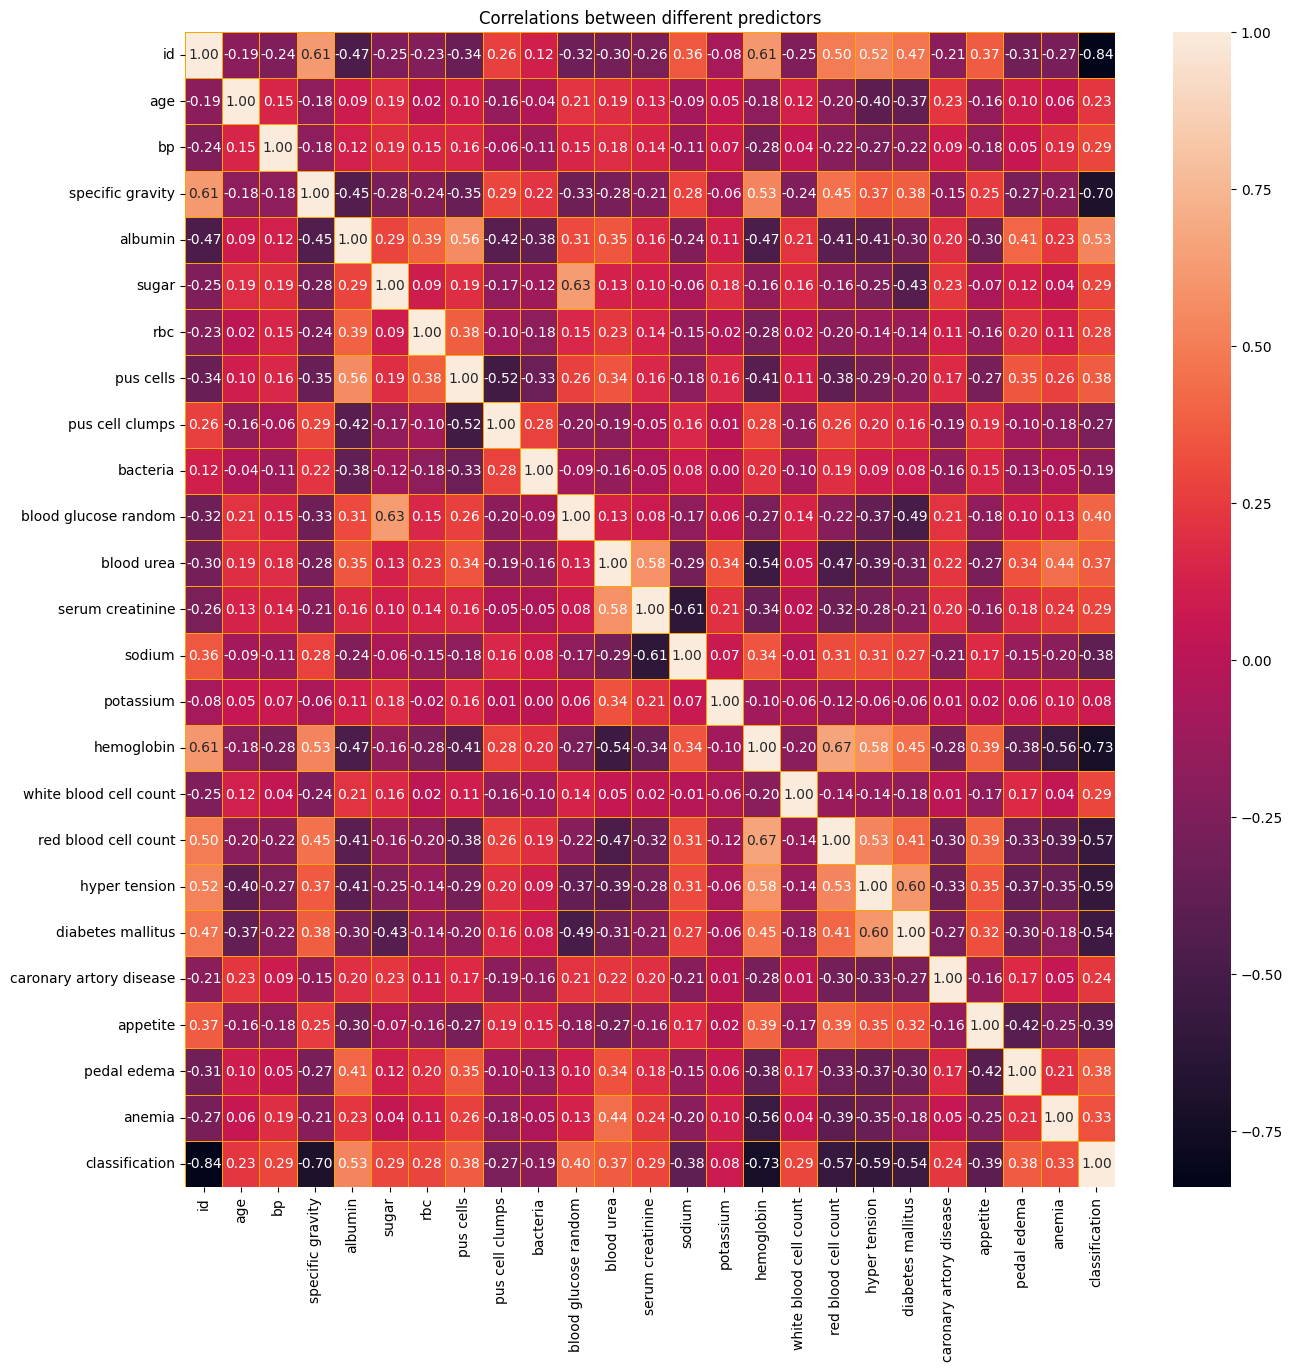

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")

plt.title('Correlations between different predictors')
plt.show()

# **Hypothesis**


### 1) How blood urea and blood pressure affect the chronic kidney disease.

<Axes: xlabel='blood urea', ylabel='bp'>

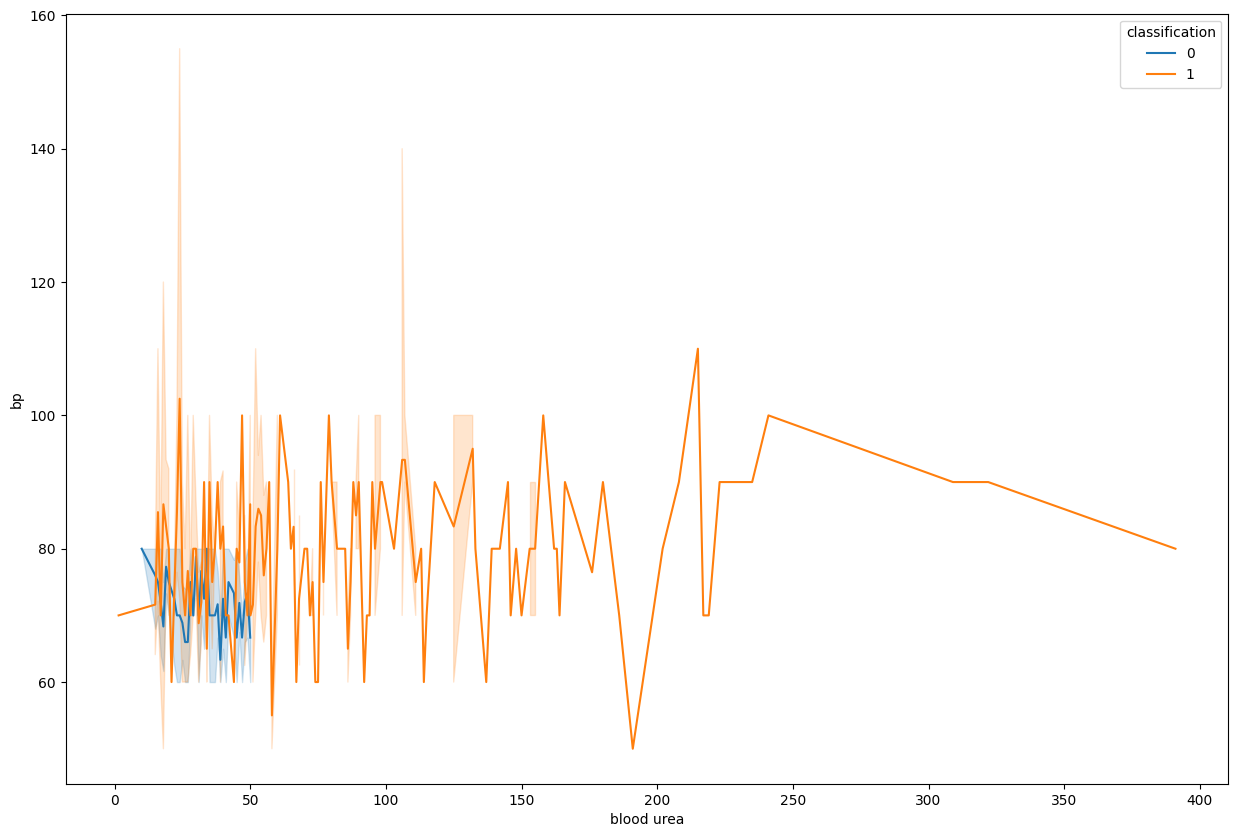

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x = "blood urea", y = "bp",hue="classification", data = df)



### CONCLUSION
#### From above graph we conclude that the if person having high bp and blood urea then then there is a high chances that he maybe affected by the Chronic Kidney Disease

###  2) Impact of blood pressure and serum creatinine on chronic kidney disease.

<Axes: xlabel='bp', ylabel='serum creatinine'>

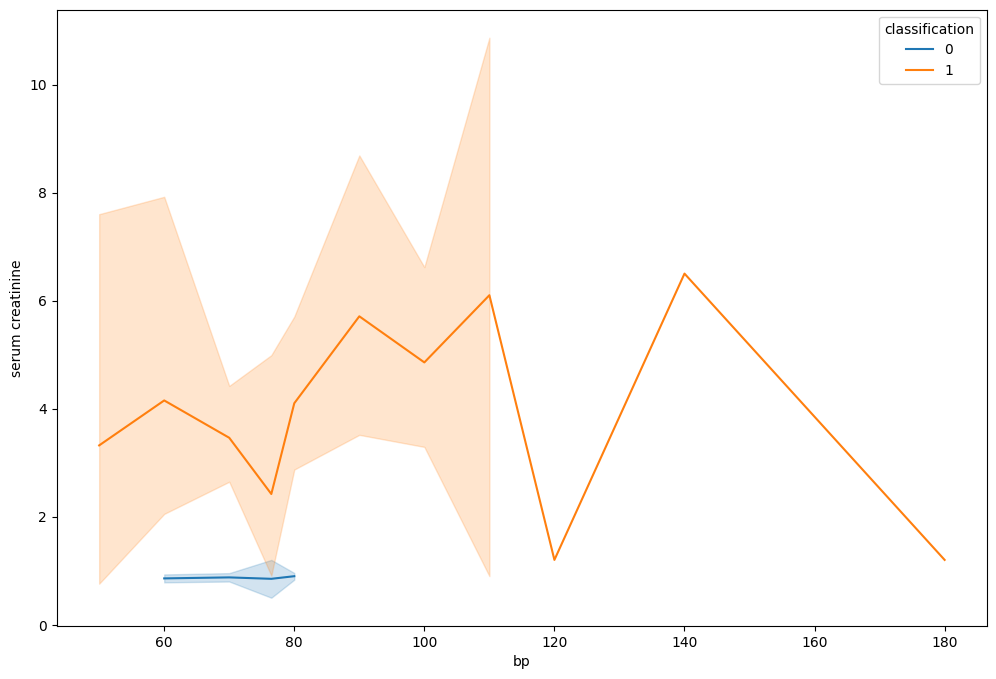

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="bp", y="serum creatinine", hue="classification")

### CONCLUSION
#### From this graph we come to know that the person having serum creatinine level above 3.0 or 4.0 is affected by the chronic kidney disease.

### 3) How normal and abnormal red blood count on chronic kidney disease.

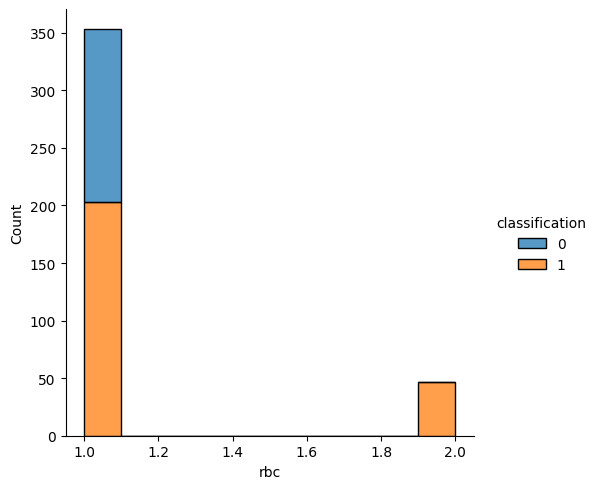

In [ ]:
sns.displot(data=df, x="rbc", hue="classification", multiple="stack")

### 4) How does the diabetes mellius related to the chronic kidney disease.

<Axes: xlabel='sugar', ylabel='blood glucose random'>

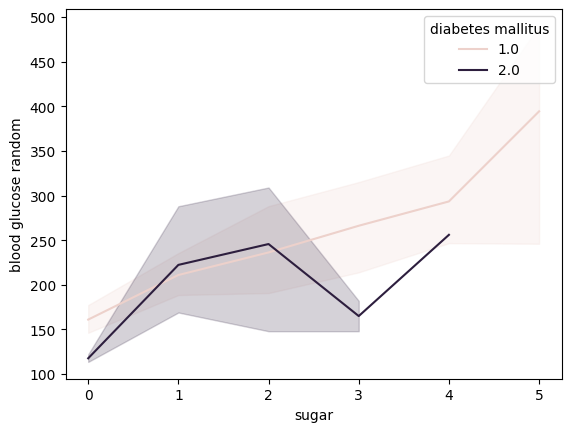

In [ ]:
sns.lineplot(data=df, x="sugar", y="blood glucose random", hue="diabetes mallitus")

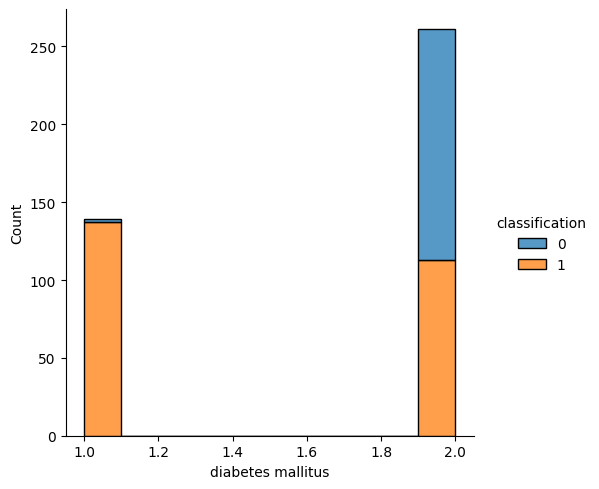

In [ ]:
sns.displot(data=df, x="diabetes mallitus", hue="classification", multiple="stack")

### 5) How are affected ckd or Non-ckd based on the blood urea


<Axes: xlabel='classification', ylabel='blood urea'>

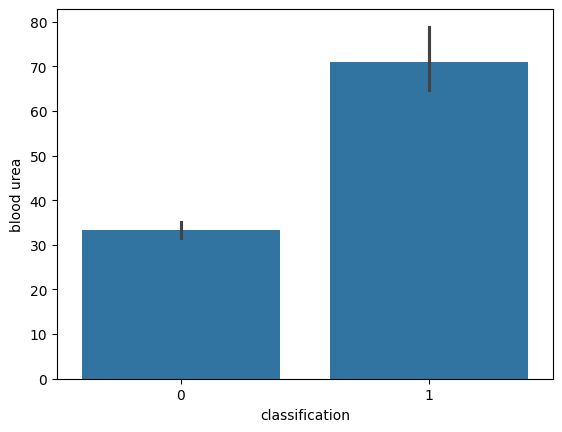

In [ ]:
sns.barplot(x='classification',y='blood urea', data=df)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x=df.iloc[:, [1,2,3,4,5,6,7,8,9,10,12,14,15,16,17,18,19,20,21,22,23,24 ]]
y=df.iloc[:,25]

In [ ]:
# Split the dataset into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {'C': [0.0001,0.001, 0.01,0.1]}

# Create a Support Vector Machine classifier
svc = svm.SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)


grid_search.fit(x_train, y_train)

y_pred = grid_search.predict(x_test)


c_optimal = grid_search.best_params_['C']
print(f'Optimal C value: {c_optimal}')

Optimal C value: 0.0001


Train data accuracy: 0.8875
Test data accuracy: 0.8625
F1 Score on Test data: 0.8865979381443299
Precision on Test data: 0.9347826086956522
Sensitivity (True Positive Rate or Recall): 0.8431372549019608
Specificity (True Negative Rate): 0.896551724137931
Recall: 0.8431372549019608


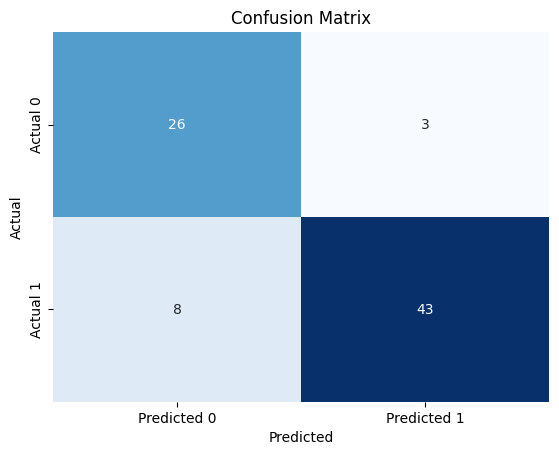

In [ ]:



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)

svc_classifier=SVC(kernel="linear", C=0.0001,gamma=0.01,random_state=22)


svc_classifier.fit(x_train,y_train)

y_pred_test=svc_classifier.predict(x_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = svc_classifier.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_test))


f1_test = f1_score(y_test, y_pred_test)
print("F1 Score on Test data:", f1_test)


precision_test = precision_score(y_test, y_pred_test)
print("Precision on Test data:", precision_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
recall = tp / (tp + fn)

print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# tn=8
# tp=43
# fn=26
# fp=3
# # Sensitivity, specificity, and recall calculation







Train data accuracy: 0.778125
Test data accuracy: 0.7625
F1 Score on Test data: 0.8080808080808081
Precision on Test data: 0.8333333333333334
Sensitivity (True Positive Rate or Recall): 0.7843137254901961
Specificity (True Negative Rate): 0.7241379310344828
Recall: 0.7843137254901961
Sensitivity (True Positive Rate or Recall) on Test data: 0.7843137254901961


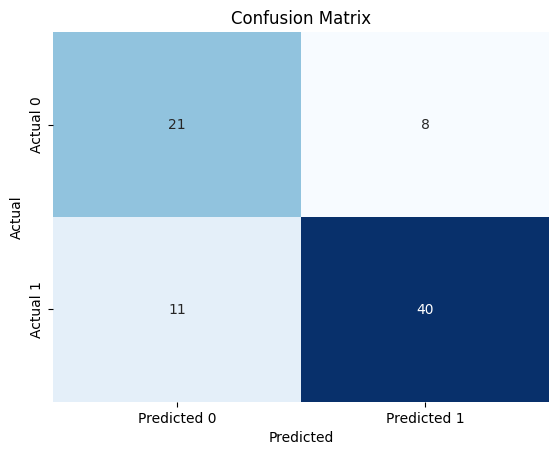

In [ ]:


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=22)


svc_classifier=SVC(kernel="rbf" ,C=400,random_state=22)


svc_classifier.fit(x_train,y_train)

y_pred_test=svc_classifier.predict(x_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred =svc_classifier.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_test))

f1_test = f1_score(y_test, y_pred_test)
print("F1 Score on Test data:", f1_test)

precision_test = precision_score(y_test, y_pred_test)
print("Precision on Test data:", precision_test)
precision_test = precision_score(y_test, y_pred_test)


# Sensitivity, specificity, and recall calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
recall = tp / (tp + fn)

print("Sensitivity (True Positive Rate or Recall):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Recall:", recall)
from sklearn.metrics import recall_score

# ... (your existing code)

# Calculate sensitivity (recall)
recall_test = recall_score(y_test, y_pred_test)
print("Sensitivity (True Positive Rate or Recall) on Test data:", recall_test)



conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()





Test data accuracy with 2 estimators: 0.7375
F1 Score on Test data: 0.7789473684210527
Precision on Test data: 0.8409090909090909
Sensitivity (True Positive Rate or Recall) on Test data: 0.7254901960784313
Specificity (True Negative Rate) on Test data: 0.7586206896551724


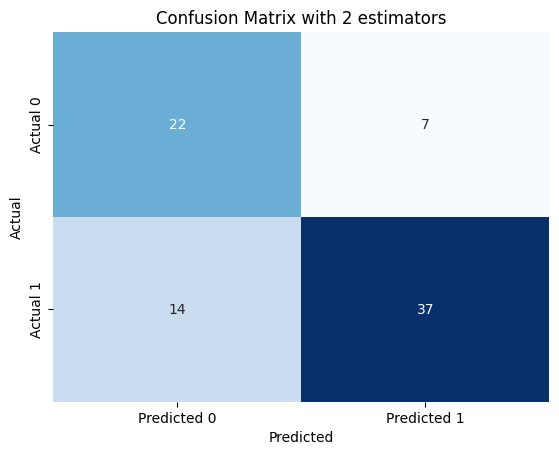

Test data accuracy with 4 estimators: 0.8875
F1 Score on Test data: 0.9126213592233009
Precision on Test data: 0.9038461538461539
Sensitivity (True Positive Rate or Recall) on Test data: 0.9215686274509803
Specificity (True Negative Rate) on Test data: 0.8275862068965517


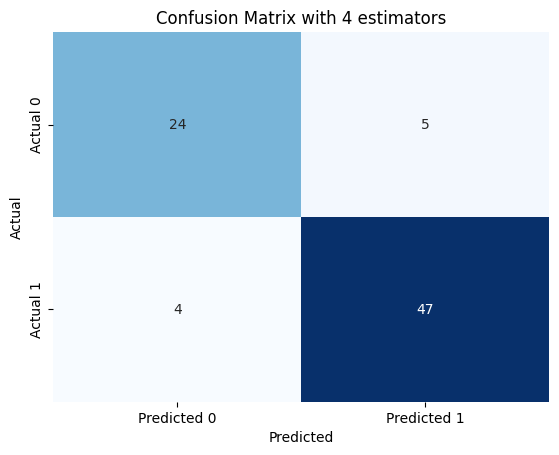

Test data accuracy with 6 estimators: 0.9125
F1 Score on Test data: 0.9320388349514563
Precision on Test data: 0.9230769230769231
Sensitivity (True Positive Rate or Recall) on Test data: 0.9411764705882353
Specificity (True Negative Rate) on Test data: 0.8620689655172413


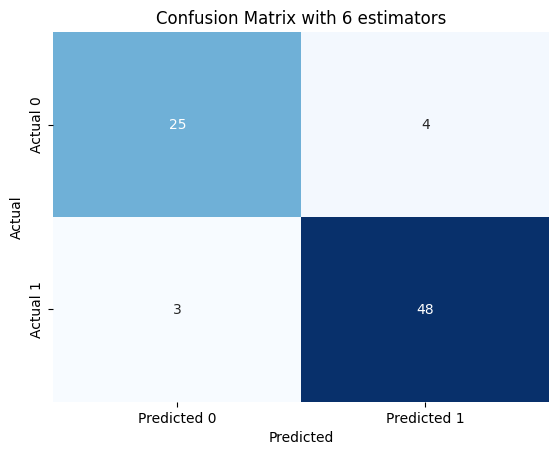

Test data accuracy with 8 estimators: 0.925
F1 Score on Test data: 0.9423076923076923
Precision on Test data: 0.9245283018867925
Sensitivity (True Positive Rate or Recall) on Test data: 0.9607843137254902
Specificity (True Negative Rate) on Test data: 0.8620689655172413


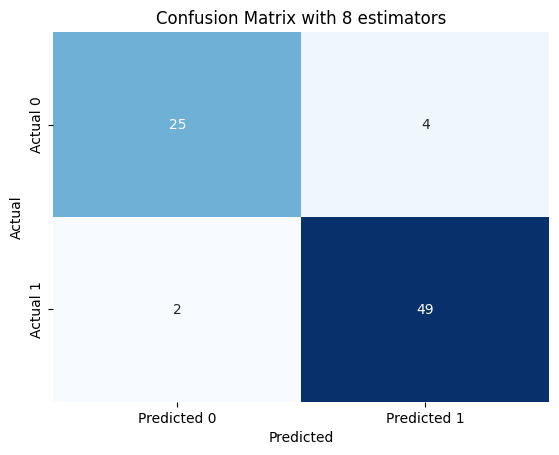

Test data accuracy with 10 estimators: 0.8875
F1 Score on Test data: 0.9108910891089109
Precision on Test data: 0.92
Sensitivity (True Positive Rate or Recall) on Test data: 0.9019607843137255
Specificity (True Negative Rate) on Test data: 0.8620689655172413


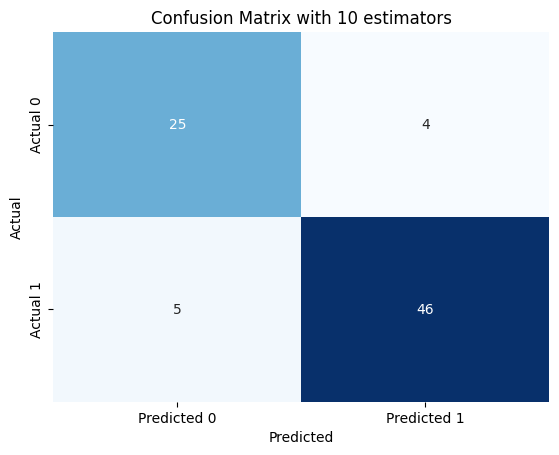

the accuracy score [0.7375, 0.8875, 0.9125, 0.925, 0.8875]


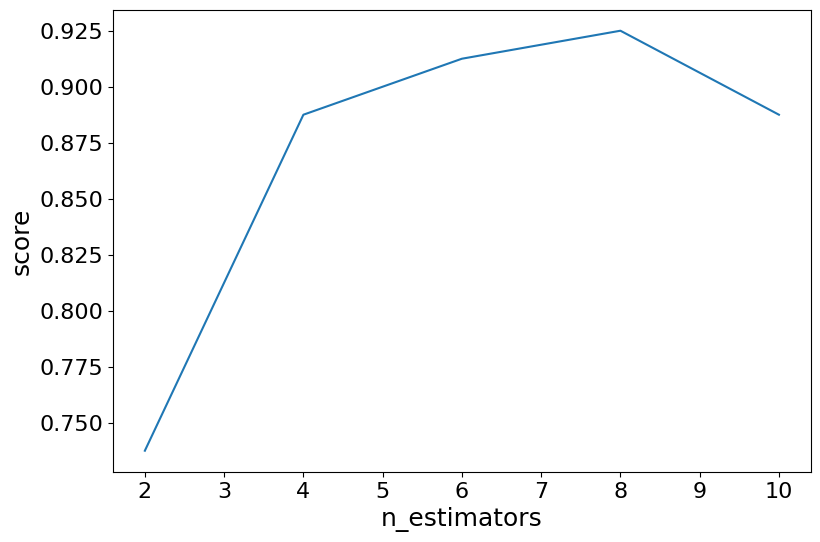

In [ ]:



max_samples = 0.02
max_features = 0.5
scores=[]
x=df.iloc[:,[1,2,4,5,6,7,8,9,10,12,13,14,16,17,19,20,21,22,23,24]]
y=df.iloc[:,25]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22)

# Different values of n_estimators
estimator_range = [2, 4, 6, 8, 10]

for n_estimators in estimator_range:

    base_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2,random_state=42)
    bagging_clf = BaggingClassifier(base_model, n_estimators=n_estimators,max_samples =max_samples ,max_features =max_features ,  random_state=22)

    # Fit the BaggingClassifier
    bagging_clf.fit(x_train, y_train)

    # Predictions
    y_pred_test = bagging_clf.predict(x_test)


    print(f"Test data accuracy with {n_estimators} estimators:", accuracy_score(y_true=y_test, y_pred=y_pred_test))
    scores.append(accuracy_score(y_true = y_test, y_pred = y_pred_test))

    f1_test = f1_score(y_test, y_pred_test)
    print("F1 Score on Test data:", f1_test)

    precision_test = precision_score(y_test, y_pred_test)
    print("Precision on Test data:", precision_test)

    recall_test = recall_score(y_test, y_pred_test)
    print("Sensitivity (True Positive Rate or Recall) on Test data:", recall_test)



    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    specificity_test = tn / (tn + fp)
    print("Specificity (True Negative Rate) on Test data:", specificity_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Plot the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix with {n_estimators} estimators")
    plt.show()





print("the accuracy score",scores)

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)


plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


In [ ]:
new_data = [[48, 80,1,0,1,1,0,0,123,1.2,111,2.5,44,7800,1,0,1,0,1,1]]  # Exclude the feature at 0th index

# Now, you can use the trained BaggingClassifier to make predictions
predicted_label = bagging_clf.predict(new_data)

print("Predicted Label:", predicted_label)

Predicted Label: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
import pandas as pd


In [ ]:
df = df.astype('float32')

In [ ]:
df=df.to_numpy()

In [ ]:
training=df[0:320]
testing=df[320:]
print(training.shape)
print(testing.shape)

(320, 26)
(80, 26)


In [ ]:
training_features=training[:,1:-1]
training_labels=training[:,-1]
testing_features=testing[:,1:-1]
testing_labels=testing[:,-1]


In [ ]:
print(training_features.shape)
print(testing_features.shape)
testing_features[0].shape

(320, 24)
(80, 24)


(24,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features)
testing_features_scaled = scaler.transform(testing_features)

model=Sequential()
model.add(Input(shape=(24,)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
# model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam



model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history=model.fit(training_features_scaled,training_labels,epochs=35,validation_data=(testing_features_scaled,testing_labels))

Epoch 1/35
10/10 [==============================] - 1s 24ms/step - loss: 0.6119 - accuracy: 0.6719 - val_loss: 0.5942 - val_accuracy: 0.8000
Epoch 2/35
10/10 [==============================] - 0s 7ms/step - loss: 0.6187 - accuracy: 0.6656 - val_loss: 0.5855 - val_accuracy: 0.8250
Epoch 3/35
10/10 [==============================] - 0s 7ms/step - loss: 0.5974 - accuracy: 0.6875 - val_loss: 0.5771 - val_accuracy: 0.8250
Epoch 4/35
10/10 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7031 - val_loss: 0.5678 - val_accuracy: 0.8625
Epoch 5/35
10/10 [==============================] - 0s 5ms/step - loss: 0.5561 - accuracy: 0.7594 - val_loss: 0.5582 - val_accuracy: 0.8875
Epoch 6/35
10/10 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.7500 - val_loss: 0.5498 - val_accuracy: 0.9000
Epoch 7/35
10/10 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7781 - val_loss: 0.5438 - val_accuracy: 0.9000
Epoch 8/35
10/10 [=

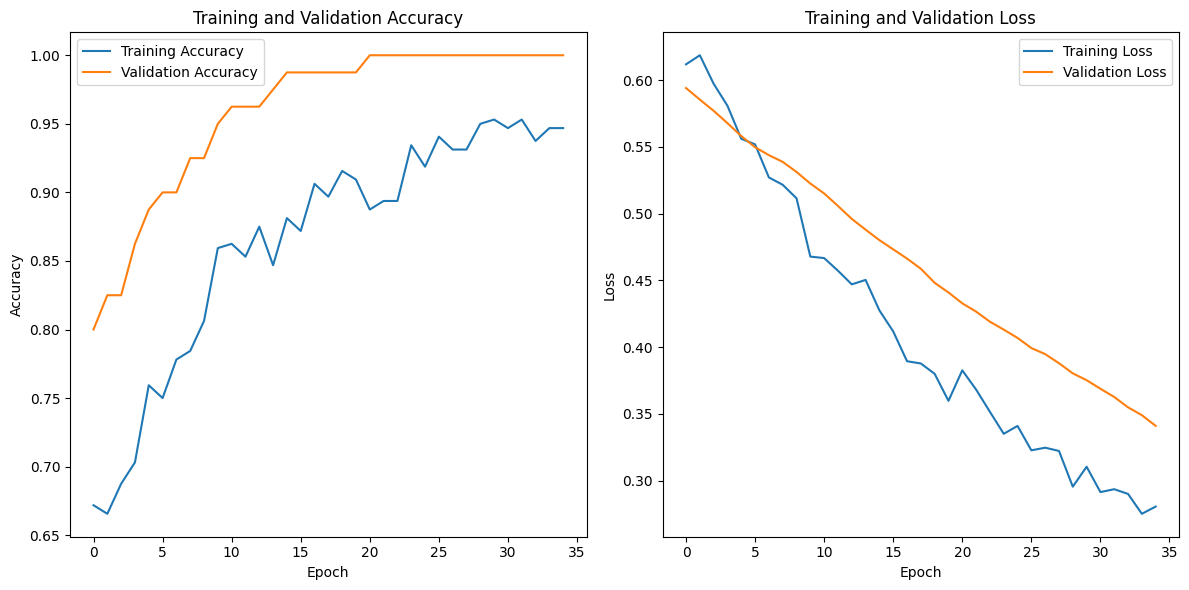

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the plots to a file
plt.tight_layout()
plt.savefig("training_validation_plots.png")
plt.show()